# astropy.io
---

## 1. Create a multi-extension FITS(MEF) file from scratch

This example demonstrates how to create a multi-extension FITS (MEF) file from scratch using astropy.io.fits.

By: Erik Bray

License: BSD

In [2]:
import astropy.config.paths

In [3]:
astropy.config.paths.get_cache_dir()

'C:\\Users\\jeffr\\.astropy\\cache'

## Usage Within Astropy

In [5]:
from astropy.time import Time

In [6]:
Time.now().ut1

<Time object: scale='ut1' format='datetime' value=2023-01-19 09:22:28.580580>

In [7]:
from astropy.utils.data import get_pkg_data_contents
print(get_pkg_data_contents("coordinates/sites-un-ascii"))

# these are all mappings from the name in sites.json (which is ASCII-only) to the "true" unicode names
TUBITAK->T횥B캅TAK


# 2. Accessing data stored as a table in a multi-extension FITS(MEF) file

In [8]:
from astropy.io import fits
from astropy.table import Table
from astropy.utils.data import get_pkg_data_filename

In [9]:
event_filename = get_pkg_data_filename('tutorials/FITS-tables/chandra_events.fits')

In [10]:
fits.info(event_filename)

Filename: C:\Users\jeffr\.astropy\cache\download\url\333246bccb141ea3b4e86c49e45bf8d6\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    890   483964R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           1 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           0 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   


In [11]:
events = Table.read(event_filename, hdu = 1)

In [12]:
print(events.columns)

<TableColumns names=('time','ccd_id','node_id','expno','chipx','chipy','tdetx','tdety','detx','dety','x','y','pha','pha_ro','energy','pi','fltgrade','grade','status')>


In [14]:
print(events['energy'].unit)

eV


In [15]:
print(events['energy'])

  energy 
    eV   
---------
13874.715
2621.1938
12119.018
3253.0364
14214.382
1952.7239
3267.5334
3817.0366
2252.7295
6154.1094
      ...
4819.8286
12536.866
2599.5652
15535.768
6653.0815
14362.482
14653.954
 6652.827
 9672.882
1875.9359
Length = 483964 rows


# 3. Create a multi-extension FITS(MEF) file from scratch

In [16]:
import os 
from astropy.io import fits

In [17]:
new_hdul = fits.HDUList()

In [18]:
new_hdul.append(fits.ImageHDU())
new_hdul.append(fits.ImageHDU())

In [19]:
new_hdul.writeto('test.fits')

In [20]:
hdu1 = fits.PrimaryHDU()
hdu2 = fits.ImageHDU()
new_hdul = fits.HDUList([hdu1, hdu2])
new_hdul.writeto('test.fits', overwrite = True)

In [21]:
# os.remove('test.fits')

# 4. Read and plot an image from a FITS file

In [22]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [23]:
# download the example FITS files used by this example:

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')

In [24]:
image_data = fits.getdata(image_file, ext = 0)

In [25]:
print(image_data.shape)

(893, 891)


In [30]:
import numpy as np

print(np.array(image_data.data))
print("-"*50, '\n')
print(np.array(image_data.data)[495:515, 495:515])

[[ 7201  6642  6642 ...  9498  9498 10057]
 [ 6642  6363  6642 ... 10057 10616 10616]
 [ 6922  6642  6922 ... 10337 11175 10616]
 ...
 [ 5412  5132  5412 ... 13000 12580 12021]
 [ 5796  5517  5796 ... 12546 12546 11987]
 [ 5796  5796  6076 ... 11987 12546 12546]]
-------------------------------------------------- 

[[ 7546  7546  7546  7546  7485  7765  8184  7904  7625  8184  8324  8044
   7730  7450  7730  8009  7939  7660  7800  7520]
 [ 7546  7546  7267  7267  7485  7765  7904  7625  7345  7904  8044  7765
   7730  8009  8289  8009  7939  8219  8079  7241]
 [ 7267  7826  7406  7127  8044  8324  7904  7625  7625  7904  7625  7345
   7869  8149  8009  7730  8219  8498  8498  8219]
 [ 7267  7826  7686  7406  8044  8324  7904  8184  7904  7625  7345  7625
   8149  8428  8009  7730  7939  8778  9057  8778]
 [ 6970  8088  8227  7668  8062  8341  7782  8062  7712  6874  6874  7433
   7852  8131  8271  7433  7922  9319  9459  8900]
 [ 7249  8367  8227  7668  7503  7782  7782  8062  7433  7

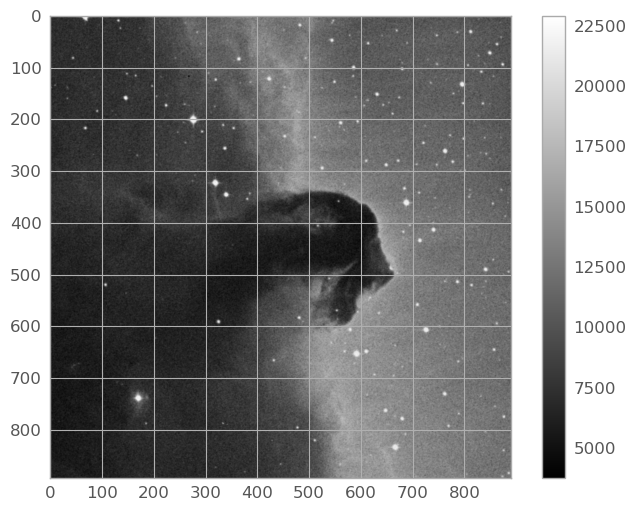

In [31]:
plt.figure()
plt.imshow(image_data, cmap = 'gray')
plt.colorbar()

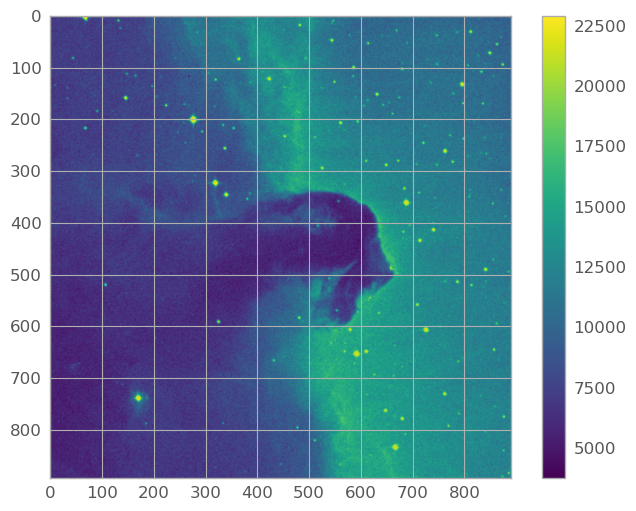

In [34]:
plt.figure()
plt.imshow(image_data, cmap = 'viridis')
plt.colorbar()

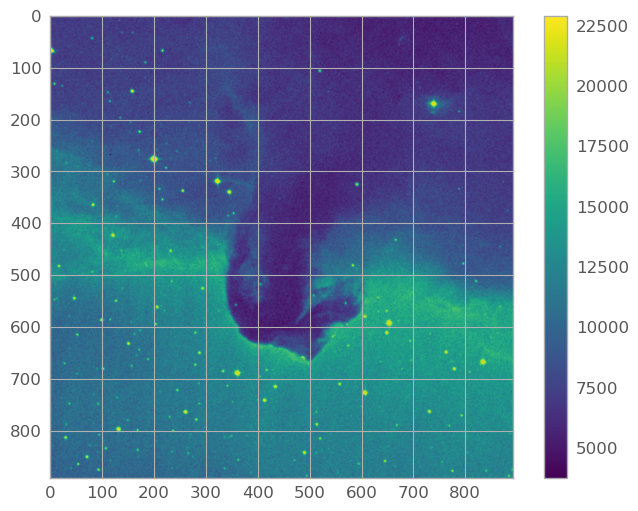

In [35]:
plt.figure()
plt.imshow(image_data.transpose(), cmap = 'viridis')
plt.colorbar()

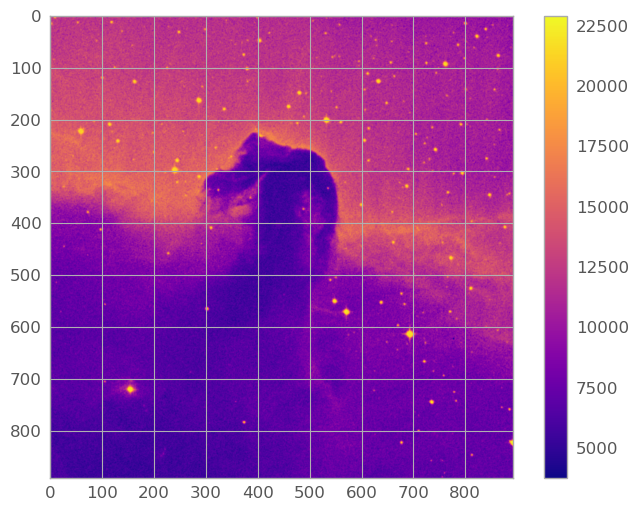

In [44]:
# 행렬의 좌표변환을 이용한 image flip

plt.figure()
plt.imshow(np.rot90(np.flipud(image_data)), cmap = 'plasma')
plt.colorbar()

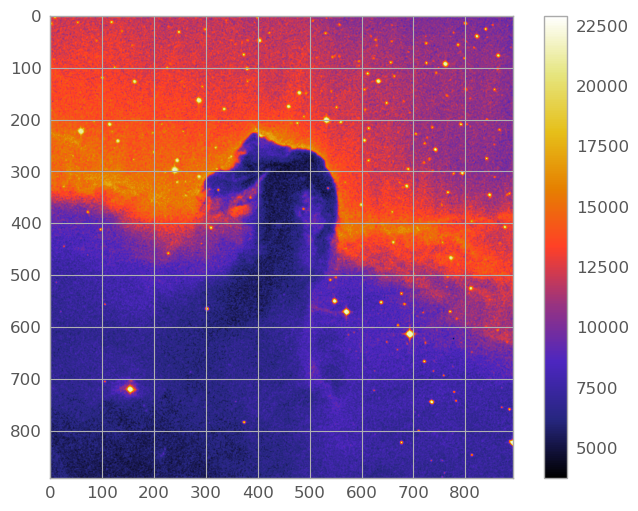

In [48]:
plt.figure()
plt.imshow(np.rot90(np.flipud(image_data)), cmap = 'CMRmap')
plt.colorbar()

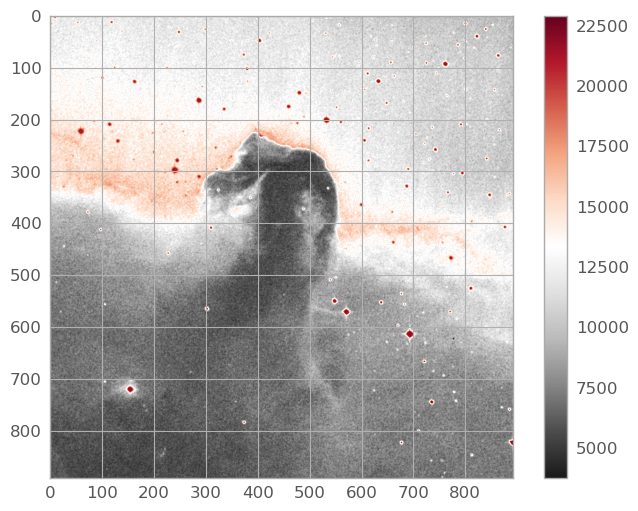

In [51]:
orig_map = plt.cm.get_cmap('RdGy')
reversed_map = orig_map.reversed()

plt.figure()
plt.imshow(np.rot90(np.flipud(image_data)), cmap = reversed_map)
plt.colorbar()

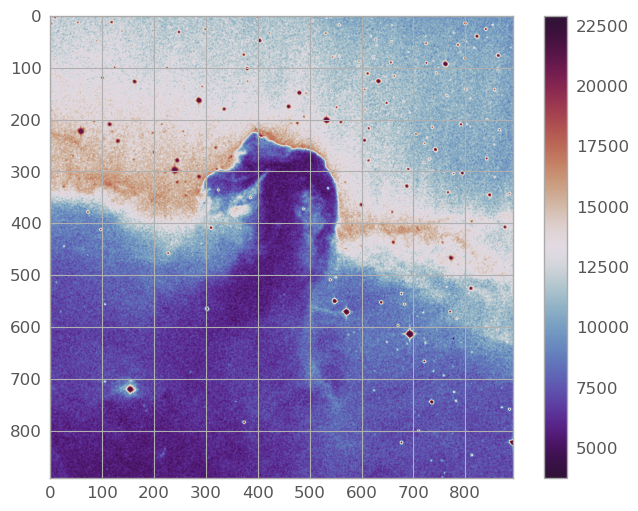

In [53]:
plt.figure()
plt.imshow(np.rot90(np.flipud(image_data)), cmap = 'twilight_shifted')
plt.colorbar()

In [54]:
plt.figure()
plt.imshow(np.rot90(np.flipud(image_data)), cmap = 'Spectral')
plt.colorbar()

In [55]:
plt.figure()
plt.imshow(np.rot90(np.flipud(image_data)), cmap = 'binary')
plt.colorbar()

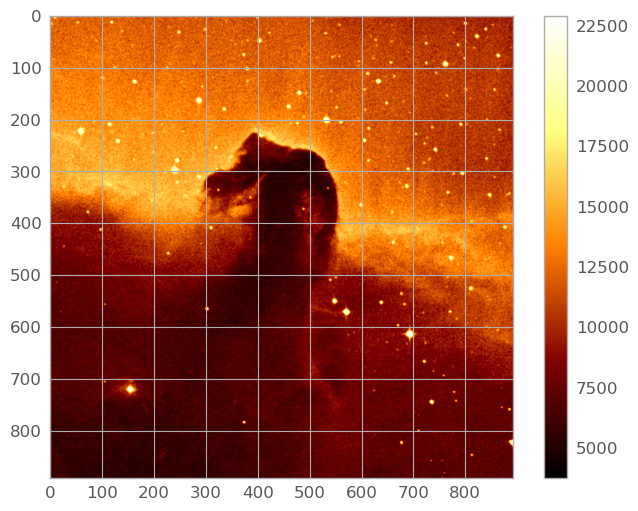

In [57]:
plt.figure()
plt.imshow(np.rot90(np.flipud(image_data)), cmap = 'afmhot')
plt.colorbar()

In [59]:
plt.figure()
plt.imshow(np.rot90(np.flipud(image_data)), cmap = 'gist_heat')
plt.colorbar()

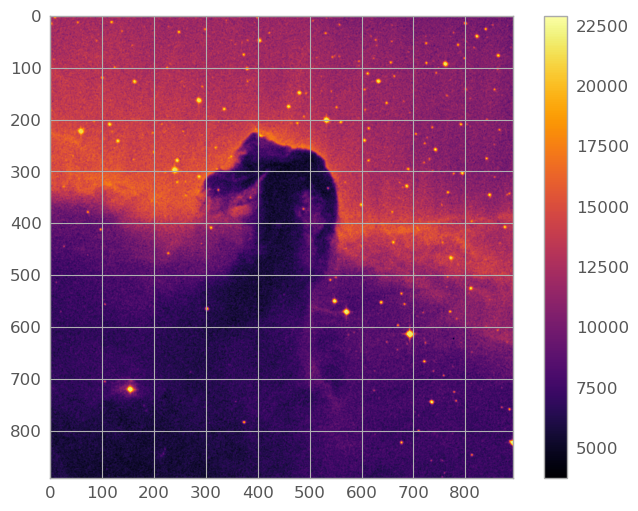

In [60]:
plt.figure()
plt.imshow(np.rot90(np.flipud(image_data)), cmap = 'inferno')
plt.colorbar()

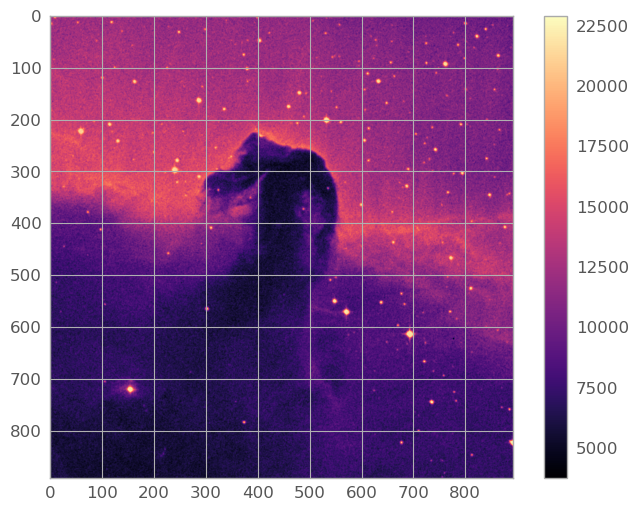

In [61]:
plt.figure()
plt.imshow(np.rot90(np.flipud(image_data)), cmap = 'magma')
plt.colorbar()

In [62]:
plt.figure()
plt.imshow(np.rot90(np.flipud(image_data)), cmap = 'cividis')
plt.colorbar()